# Overview of functions from cross interactions from Helmholtz

Overview of python functions from `biosspheres.helmholtz.crossinteractions`.

In [1]:
import biosspheres.helmholtz.crossinteractions as cross

In [2]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import biosspheres.quadratures.sphere as quadratures
import biosspheres.miscella.auxindexes as auxindexes

## Preliminaries

### Geometry


All the python functions assume the following geometry:

$N$ disjoint spheres in $\mathbb{R}^3$:
- Position vectors of the sphere centers: $\mathbf{p_j} \in \mathbb{R}^3$, with $j \in \{1,...,N\}$.  
- Radii: $\tilde{r}_j\in \mathbb{R}^+$, with $j \in \{1,...,N\}$.
- Interior of sphere $j$: $\Omega_j:=\{ \mathbf{x} \in \mathbb{R}^3:||\mathbf{x}-\mathbf{p_j}||_2<\tilde{r}_j \}$.
- Boundary of sphere $j$: $\Gamma_j:=\partial \Omega_j$.
- Exterior medium, $\Omega_0$: defined as $\mathbb{R}^3$ without the spheres and their boundaries.

### Free space fundamental solution for the Helmholtz equation

The free space fundamental solution of the Helmholtz equation with $k>0$, which satisfies the radiation condition is:
$$g_j\left(\mathbf{r},\mathbf{r'}\right):= \frac{e^{ik_j||\mathbf{r}-\mathbf{r}'||}}{4\pi ||\mathbf{r}-\mathbf{r}'||}, \quad \text{with } \mathbf{r}\not = \mathbf{r'}, \quad \text{and }-\left( \Delta + k_j^2 \right) g_j \left(\mathbf{r},\mathbf{r'}\right)=\delta \left(\mathbf{r}-\mathbf{r'}\right).$$

This is the kernel of the operators which numerical approximations are python functions from this module.

### Layer operators

Single and double layer operators defined for smooth densities:
$$DL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  \psi\left(\mathbf{r}'\right) \nabla g_0\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{0j} \ dS',$$
$$SL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) g_0\left(\mathbf{r},\mathbf{r'}\right) dS'},$$
$$DL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) \nabla g_j\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{j} \ dS'},$$
$$SL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}' \right) g_j\left(\mathbf{r},\mathbf{r'}\right) dS'}$$

with the gradient being taken with respect to $\mathbf{r}'$, $\widehat{\mathbf{n}}_j$ being the exterior normal vector of $\Omega_j$, and $\widehat{\mathbf{n}}_j=-\widehat{\mathbf{n}}_{0j}$.

These operators are linear and continuous in the following Sobolev spaces:
$$DL_{0j}: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{0j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}  \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right)  , $$
$$DL_{j}: H^{\frac{1}{2}}(\Gamma_j)\rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}\left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right).$$

### Boundary integral operators

For $u\in C^\infty(\overline\Omega)$, Dirichlet and Neumann traces operators are defined as 
$$\gamma_d u := u|_{\Gamma},\qquad \gamma_n u := \nabla  u|_{\Gamma} \cdot \widehat{n},$$
where $\widehat{n}$ is the exterior unit normal.

By density arguments, the definition of Dirichlet and Neumann traces operator can be extended to $u_j \in H^1_{loc}(\Omega_j)$, with $j \{0, ..., N \}$. We extend the notation as follows

$$\gamma_d^{0j} u_0 := u_0|_{\Gamma_j},$$
$$\gamma_d^{j} u_j := u_0|_{\Gamma_j},$$
$$\gamma_n^{0j} u_0 := \nabla u_0|_{\Gamma_j} \cdot \widehat{n}_{0j},$$
$$\gamma_n^{j} u_j := \nabla u_0|_{\Gamma_j}\cdot \widehat{n}_{j},$$
where $\widehat{n}_{j}$ is the exterior normal of $\Omega_j$, with $j\in \{ 1, ..., N\}$ and $\widehat{n}_{0j}=-\widehat{n}_{j}$.

Now, we recall the definition of the boundary integral operators:
$$\begin{align*}
	V_{s,j}^0 &:=  \frac{1}{2} \left( \gamma_d^{s} SL_{0j} + \gamma_d^{0s} SL_{0j} \right) ,
	& V_{j}&:= \frac{1}{2} \left(  \gamma_d^{0j} SL_{j} + \gamma_d^{j} SL_{j} \right) ,\\
	K_{s,j}^0&:= \frac{1}{2} \left(\gamma_d^{s} DL_{0j} + \gamma_d^{0s} DL_{0j} \right) ,
	&K_{j}&:= \frac{1}{2} \left(\gamma_d^{0j} DL_{j} + \gamma_d^{j} DL_{j} \right),\\
	K^{*0}_{s,j}&:= \frac{1}{2} \left( - \gamma_n ^{s} SL_{0j} + \gamma_n ^{0s} SL_{0j}  \right),
	 & K^{*}_{j} &:= \frac{1}{2} \left( -\gamma_n ^{0j} SL_{j}  + \gamma_n ^{j} SL_{j} \right), \\
	W_{s,j}^0 &:= -\frac{1}{2} \left( - \gamma_n^{s} DL_{0j}  + \gamma_n^{0s} DL_{0j} \right) ,
	& W_{j} &:=- \frac{1}{2} \left( -\gamma_n^{0j} DL_{j} + \gamma_n^{j} DL_{j} \right).
\end{align*}$$

These operators are linear and continuous in the following Sobolev spaces: 
$$\begin{align*}
	V_{s,j}^0 &: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&V_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j),\\
	W_{s,j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&W_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j) ,\\
	K_{s,j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&K_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j) ,\\
	K^{*0}_{s,j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&K^*_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j).
\end{align*}$$

Since the domains are smooth, the jump relations for the potentials across a closed boundary yield
$$\begin{align*}
	V_{s,j}^0 &=   \gamma_d^{0s} SL_{0j},
	& V_{j}&=  \gamma_d^{j} SL_{j},\\
	W_{s,j}^0 &=-  \gamma_n^{0s} DL_{0j},
	& W_{j} &=- \gamma_n^{j} DL_{j}, \\
	  K_{s,j}^0&= \gamma_d^{0s} DL_{0j}\text{ with } s \not=j,
	 & K^{*0}_{s,j} &= \gamma_n ^{0s} SL_{0j}\text{ with } s  \not=j,
\end{align*}$$
and
$$\begin{align*}
	K_{j,j}^0(\psi) &= \frac{1}{2}\psi +\gamma_d^{0j} {DL_{0j}(\psi)} ,
	&K_{j}(\psi) &= \frac{1}{2} \psi +\gamma_d^{j} {DL_{j}(\psi)} ,\\
	 K^{*0}_{j,j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^{0j} {SL_{0j}(\psi)},
	&K^*_{j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^j {SL_{j}(\psi)}.
\end{align*}$$

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

Also, the gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Associated Legendre functions

$P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad \text{with} \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

### Complex spherical harmonics

Complex spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$Y_{l,m}\left(\theta,\varphi\right) := \sqrt{ \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\left(\theta\right)\right) e^{i m \varphi},$$
$$Y_{l,-m}\left(\theta,\varphi\right) := (-1)^m\overline{Y}_{l,m}\left(\theta,\varphi\right),$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise.

### Orthonormality of spherical harmonics

Spherical harmonics are dense in $C(\mathbb{S}^2)$, with $\mathbb{S}^2$ the surface of the unit sphere, and form a complete orthonormal system in $L^2(\mathbb{S}^2)$ with respect to the internal product defined by:
$$\left( \psi , \xi \right)_{L^2(\mathbb{S}^2)} = \int_{0}^{2\pi}\int_{0}^{\pi} \psi\left(\theta,\varphi\right) \overline{\xi\left(\theta,\varphi\right) }\sin\left(\theta\right) d\theta d\varphi,$$
with $\overline{\xi\left(\theta,\varphi\right)}$ the conjugate of $\xi\left(\theta,\varphi\right)$.

They also are orthogonal in $H^1(\mathbb{S}^2)$.

### Reference systems

Let be $j\in \{1,...,N\}$. We define the reference system $j$ as the one centered at $\mathbf{p_j}$ with the same orientation that the reference system centered in the origin. Furthermore, we denote by $Y_{l,m,j}$ the spherical harmonic $Y_{l,m}$ centered in the origin of the reference system $j$. Thus, if $\left( r_j, \varphi_j, \theta_j \right) $ are the vector spherical coordinates of $\mathbf{r_j}$ in the reference system $j$, we have that $Y_{l,m,j}\left(\mathbf{r}_j\right)=Y_{l,m}\left(\theta_j, \varphi_j\right)$.

### Some expansions in spherical harmonics

#### Expansion of the fundamental solution

Let $\mathbf{r}$, $\mathbf{r}'$ be vectors, whose spherical coordinates in the reference system $j$ are $\left(r_j,\theta_j, \varphi_j \right)$ and $\left(r_j',\theta_j', \varphi_j' \right)$, respectively. For $r_j>r_j'$ we have
$$g_j\left(\mathbf{r}, \mathbf{r}'\right) = i k_j \sum_{l=0}^{\infty}  j_l(k_j r_j') h_l^{(1)}(k_j r_j) \sum_{m=-l}^l Y_{l,m,j}\left(\mathbf{r}\right)  \overline{Y_{l,m,j}}\left(\mathbf{r}'\right),$$
with $j_l$ and $h_l^{(1)}$ the spherical Bessel function and the spherical Hankel function of first kind. This series  and its term by term first derivatives with respect to $r_j$ or $r_j'$ are absolutely and uniformly convergent on compact subsets with $r_j>r_j'$.

#### Results for layer potentials

Let be $j\in \{1,\ldots,N\}$, and $\tilde{r}_j$ the radius of $\Omega_j$.
- Let $\mathbf{r} \in \Omega_0$ and $\mathbf{r}=(r,\theta,\varphi )$ be expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= -i \left( k_0 \tilde{r}_j \right)^2 j_l' (k_0 \tilde{r}_j) h_l^{(1)}(k_0 r) Y_{l,m}(\theta, \varphi ),\\
    SL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &=  i k_0 \tilde{r}_j^2 j_l (k_0 \tilde{r}_j) h_l^{(1)}(k_0 r) Y_{l,m}(\theta, \varphi ).
\end{align*}$$
- Let $\mathbf{r} \in \Omega_j$ and $\mathbf{r}=(r,\theta,\varphi )$ expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= i \left( k_j \tilde{r}_j \right)^2 h_l^{(1)'}(k_j \tilde{r}_j) j_l (k_j r)  Y_{l,m}(\theta, \varphi ),\\
    SL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= i k_j \tilde{r}_j^2 h_l^{(1)}(k_j \tilde{r}_j) j_l (k_j r) Y_{l,m}(\theta, \varphi ).
\end{align*}$$

#### Results for operators of Cross-interactions

The following holds
$$\begin{align*}
\left( V_{s,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)} &= (-1)^{m+q}\left( V_{j,s}^0\left( Y_{p,-q,s} \right) ; Y_{l,-m,j} \right)_{L^2(\Gamma_j)},\\
\left( K_{j,s}^{*0}\left( Y_{p,q,s} \right) ; Y_{l,m,j} \right)_{L^2(\Gamma_j)} &= (-1)^{m+q}\left( K_{j,i}^0\left( Y_{p,-q,s} \right) ; Y_{l,-m,j} \right)_{L^2(\Gamma_j)}\\
\left( W_{s,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)} &= (-1)^{m+q}\left( W_{j, s}^0\left( Y_{p,-q,s} \right) ; Y_{l,-m,j} \right)_{L^2(\Gamma_j)},
\end{align*}$$
If $j_l(k_0 \tilde{r}_j)\not=0$, the following holds
$$\begin{align*}
\left( K_{s,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)} &= -k_0 \frac{j_l'(k_0 \tilde{r}_j)}{j_l(k_0 \tilde{r}_j)}\left( V_{s,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)},\\
\left( W_{s,j}^0\left( Y_{l,m,j} \right) ; Y_{p,qsi} \right)_{L^2(\Gamma_s)} &= k_0 \frac{j_l'(k_0 \tilde{r}_j)}{j_l(k_0 \tilde{r}_j)} \left( K_{s,j}^{0*}\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)},
\end{align*}$$
These properties allow the reduction of the computations.

## Comments on the numerical algorithms implemented

Cross-interaction operators, e.g.~$V_{s,j}^0$ for  $i \not = j$, are non-singular, but are non diagonalizable. The double and single layer operators analytic expressions are used in the numerical computation of the boundary integral operators: 
$$\begin{align}
	\left( V_{s,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)} &= \int_{\Gamma_s} SL_{0j}(Y_{l,m,j}) \overline{Y_{p,q, s}} \ d \Gamma_s ,\\
	\left( K_{s,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)} &= \int_{\Gamma_s} DL_{0j}(Y_{l,m,j}) \overline{Y_{p,q,s}}  \ d \Gamma_s,\\
	\left( K^{*0}_{s,j}\left( Y_{l,m,j} \right) ; Y_{p,q,s} \right)_{L^2(\Gamma_s)} &= \int_{\Gamma_s}  \widehat{\mathbf{n}}_{0s} \cdot\nabla SL_{0j}(Y_{l,m,j})  \overline{Y_{p,q,s}} \ d \Gamma_s,\\
	\left( W_{s,j}^0\left( Y_{l,m,j} \right)  ; Y_{p,q,s} \right)_{L^2(\Gamma_s)} &= - \int_{\Gamma_s}   \widehat{\mathbf{n}}_{0s}\cdot \nabla DL_{0j}(Y_{l,m,j})\overline{Y_{p,q,s}}\ d \Gamma_s .
\end{align}$$

Approximations of this integrals are provided via Gauss-Legendre quadratures. Specifically, along $\theta$, we use the change of variable $u=cos(\theta)$. Then, variable functions are sampled at the zeros of the Legendre Polynomial of degree $L_c+1$, whereas the trapezoidal rule is applied to equally spaced nodes in $\varphi$, with $2L_c+1$ points. If the function being integrated has a spherical harmonic expansion with coefficients equal to zero for degrees higher than $L_c$, then the quadrature yields the exact result, assuming that there are not other sources of error. Moreover, the integral in the variable $\varphi$ can be computed using the Fast Fourier Transform.

## `v_0_sj_semi_analytic_v1d`

This function returns a numpy array of two dimensions, which we will call `data_v`. The entries of the array are
$$data_v[p(2p + 1) + q, l(2l + 1) + m] = ( V_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}$$
with Helmholtz kernel.

The `1d` on the name of the routine indicates the type of input it needs. See the following sections for details.

### Docstring

In [3]:
print(cross.v_0_sj_semi_analytic_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{s,j}^0 with
    Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    properties of the spherical harmonics.

    Notes
    -----
    data_v[p(2p + 1) + q, l(2l + 1) + m] =
        ( V_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression V_{s,j}^0 Y_{l,m,j} is analytic. A quadrature scheme
    is used to compute the surface integral corresponding to the inner
    product.

    Parameters
    ----------
    big_l : int
        >= 0, max degree of spherical harmonics used.
    k0 : float
        > 0
    r_j : float
        > 0, radius of the s

### Example

Definition of the parameters:

Radii:

In [4]:
radio_1 = 0.9
radio_2 = 0.7

Center positions of the spheres:

In [5]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [6]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [7]:
big_l = 18
big_l_c = 2 * big_l + 5

Spherical Bessel functions:

In [8]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)
j_l_2 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_2 * k0)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature, this differs from the routines without the `1d` in its name:

In [9]:
final_length, pre_vector_t, transform = quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)

In [10]:
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
    radio_2, p_1, p_2, final_length, pre_vector_t)
r_coord_2tf, phi_coord_2tf, cos_theta_coord_2tf = quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
    radio_1, p_2, p_1, final_length, pre_vector_t)

Now, we can obtain the arrays for the $V_{2,1}^0$ and $V_{1,2}^0$ operators (notice how their inputs are different depending on the subindexes):

In [11]:
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)
data_v12 = cross.v_0_sj_semi_analytic_v1d(
    big_l, k0, radio_2, radio_1, j_l_2, r_coord_2tf, phi_coord_2tf,
    cos_theta_coord_2tf, final_length, transform)

One of the properties of the cross-interactions given in the preliminaries relates `data_v21` with `data_v12`. As this a numerical approximation, we will not have the equality when checking the property.

In [12]:
sign_array = np.diag(
  (-np.ones((big_l + 1) ** 2)) ** (np.arange(0, (big_l + 1) ** 2))
)
giro_array = np.eye((big_l + 1) ** 2)
eles = np.arange(0, big_l + 1)
l_square_plus_l = eles * (eles + 1)
for el in np.arange(1, big_l + 1):
  giro_array[
    l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
    l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
  ] = np.fliplr(
    giro_array[
      l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
      l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
    ]
  )
aux = (
  giro_array
  @ sign_array
  @ np.transpose(data_v21)
  @ sign_array
  @ giro_array
)

The absolute error obtained is good:

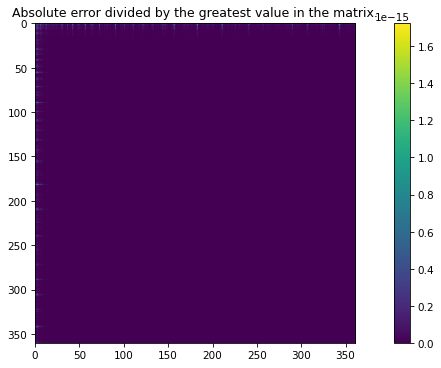

In [13]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12 - aux)/np.max(np.abs(data_v12))
plt.imshow(im)
plt.colorbar()
plt.title('Absolute error divided by the greatest value in the matrix.')
plt.show()

However, the relative error of each entry is not good for all values, specially when the entries are near to zero:

C:\Users\there\AppData\Local\Temp\ipykernel_5828\493700496.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))


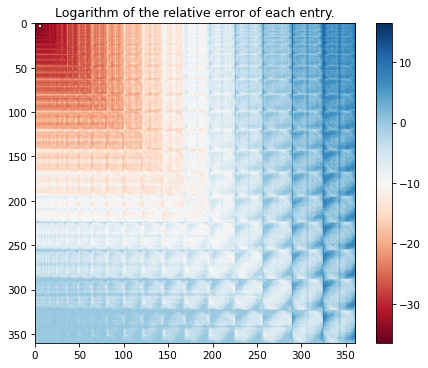

In [14]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12 - aux)/np.abs(data_v12)
plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))
plt.colorbar()
plt.title('Logarithm of the relative error of each entry.')
plt.show()

## `v_0_sj_semi_analytic_v2d`

This function returns a numpy array of two dimensions, which we will call `data_v`. The entries of the array are
$$data_v[p(2p + 1) + q, l(2l + 1) + m] = ( V_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}.$$

It is the same than `v_0_sj_semi_analytic_v1d`, but with different inputs. For bigger computations this one is faster.

See the following section for details.

### Docstring

In [15]:
print(cross.v_0_sj_semi_analytic_v2d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{s,j}^0 with
    Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of two dimensions, given by the function
    from_sphere_s_cartesian_to_j_spherical_2d of the module
    biosspheres.quadratures.spheres.

    Notes
    -----
    data_v[p(2p + 1) + q, l(2l + 1) + m] =
        ( V_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression V_{s,j}^0 Y_{l,m,j} is analytic. A quadrature scheme
    is used to compute the surface integral corresponding to the inner
    product.

    It uses functions from the package pyshtools to compute the
    spherical harmonic transforms.

    Parameters
    ----------
    big_l : int
        >= 0,

### Example

Definition of parameters:

Radii:

In [16]:
radio_1 = 0.9
radio_2 = 0.7

Center positions of the spheres:

In [17]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [18]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [19]:
big_l = 18
big_l_c = 2 * big_l + 5

Spherical Bessel function:

In [20]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [21]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = (
        quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
            radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
            pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

Now, we can obtain the array for the $V_{2,1}^0$ operator:

In [22]:
data_v21_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

We can compare the result with the one given by `v_0_sj_semi_analytic_v1d`:

In [23]:
final_length, pre_vector_t, transform = \
    quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

The absolute error obtained is good:

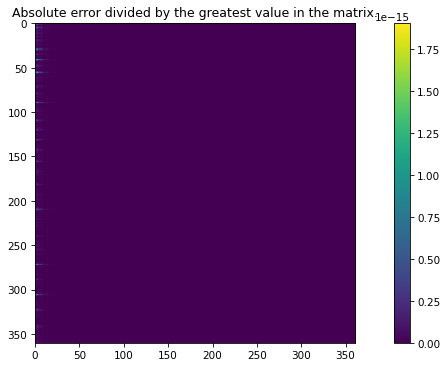

In [24]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v21 - data_v21_2d)/np.max(np.abs(data_v21))
plt.imshow(im)
plt.colorbar()
plt.title('Absolute error divided by the greatest value in the matrix.')
plt.show()

However, the relative error of each entry is not good for all values:

C:\Users\there\AppData\Local\Temp\ipykernel_5828\761239704.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))


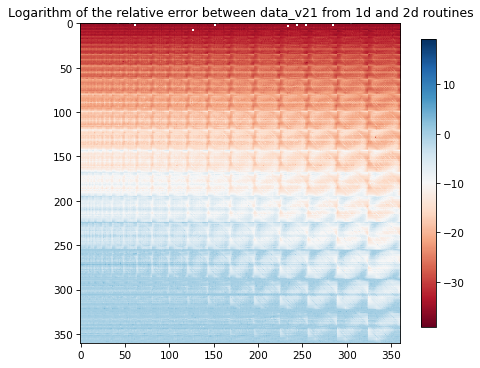

In [25]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v21_2d - data_v21) / np.abs(data_v21)
plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))
plt.colorbar(shrink=0.9)
plt.title('Logarithm of the relative error between data_v21 from 1d and 2d routines')
plt.show()

One of the properties of the cross-interactions given in the preliminaries relates `data_v21` with `data_v12`. As this a numerical approximation, we will not have the equality when checking the property. Let us check the property with this routine.

In [26]:
j_l_2 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_2 * k0)
r_coord_2tf_2d, phi_coord_2tf_2d, cos_theta_coord_2tf_2d = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_1, p_2, p_1, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d)
    )
data_v12_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, k0, radio_2, radio_1, j_l_2, r_coord_2tf_2d, phi_coord_2tf_2d,
    cos_theta_coord_2tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

In [27]:
sign_array = np.diag(
  (-np.ones((big_l + 1) ** 2)) ** (np.arange(0, (big_l + 1) ** 2))
)
giro_array = np.eye((big_l + 1) ** 2)
eles = np.arange(0, big_l + 1)
l_square_plus_l = eles * (eles + 1)
for el in np.arange(1, big_l + 1):
  giro_array[
    l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
    l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
  ] = np.fliplr(
    giro_array[
      l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
      l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
    ]
  )
aux = (
  giro_array
  @ sign_array
  @ np.transpose(data_v21_2d)
  @ sign_array
  @ giro_array
)

And we have the same result as in the previous section. The relative error of each entry is not good for all values, specially when the entries are near to zero.

C:\Users\there\AppData\Local\Temp\ipykernel_5828\4284564057.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))


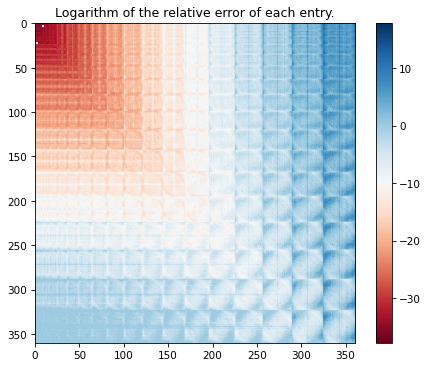

In [28]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12_2d - aux)/np.abs(data_v12_2d)
plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))
plt.colorbar()
plt.title('Logarithm of the relative error of each entry.')
plt.show()

C:\Users\there\AppData\Local\Temp\ipykernel_5828\1859762760.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im)>-7, interpolation=None)


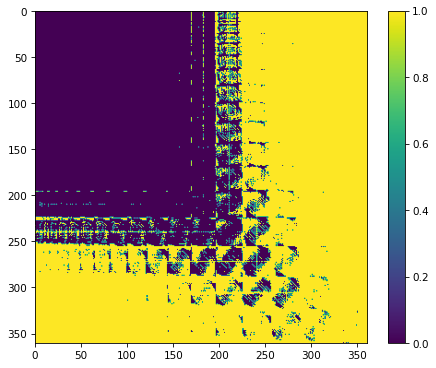

In [29]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12_2d - aux) /np.abs(data_v12_2d)
plt.imshow(np.log(im)>-7, interpolation=None)
plt.colorbar()
plt.title('')
plt.show()

## `v_0_js_from_v_0_sj`

This function returns a numpy array of two dimensions, which we will call `data_vjs`. The entries of the array are
$$data_vjs[p(2p+1) + q, l(2l+1) + m] = ( V_{j,s}^0 Y_{l,m,s} ; Y_{p,q,j} )_{L^2(\mathcal{S}_s)}.$$

For obtaining the array corresponding to the operator $V^0_{j,s}$ the input needed is the array corresponding to the operator $V^0_{s,j}$. This functions uses the property of the arrays `data_v21 = data_v12`$^t$, showed in the example of `v_0_sj_semi_analytic_v1d`.

### Docstring

In [30]:
print(cross.v_0_js_from_v_0_sj.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{j,s}^0 with
    Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    This routine needs the numpy array corresponding to V_{s,j}^0
    (notice the change of the order of the indexes indicating the
    spheres).

    Notes
    -----
    data_v_js[p*(2p+1) + q, l*(2l+1) + m] =
        ( V_{j,s}^0 Y_{l,m,s} ; Y_{p,q,j} )_{L^2(S_j)}.
    Y_{l,m,s} : spherical harmonic degree l, order m, in the coordinate
        system s.
    S_j : surface of the sphere j.

    This computation uses the following result for this specific case:
    ( V_{j,s}^0 Y_{l,m,s} ; Y_{p,q,j} )_{L^2(S_j)}.
        = (-1)**(m+q) ( V_{s,j}^0 Y_{p,-q,j} ; Y_{l,-m,s} )_{L^2(S_s)}

    Parameters
    ----------
    data_v_sj : np.ndarray
        represents a numerical approximation of the matrix formed by the
        boundary integral operator V_{s,j}^0 with Helmholtz

### Example

Definition of the parameters:

Radii:

In [31]:
radio_1 = 3.
radio_2 = 2.

Center positions of the spheres:

In [32]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [33]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rules:

In [34]:
big_l = 12
big_l_c = 2 * big_l + 5

We use one of the previous routines to compute the array `data_v12_2d`:

In [35]:
j_l_2 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_2 * k0)
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_2tf_2d, phi_coord_2tf_2d, cos_theta_coord_2tf_2d = \
    (quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_1, p_2, p_1, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)
data_v12_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, k0, radio_2, radio_1, j_l_2, r_coord_2tf_2d, phi_coord_2tf_2d,
    cos_theta_coord_2tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

And we use that as input to compute the array `data_v21`:

In [36]:
data_v21 = cross.v_0_js_from_v_0_sj(data_v12_2d)

We can compare the given result with the version computed by one of the previous routines:

In [37]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
data_v21_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

C:\Users\there\AppData\Local\Temp\ipykernel_5828\2070610888.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))


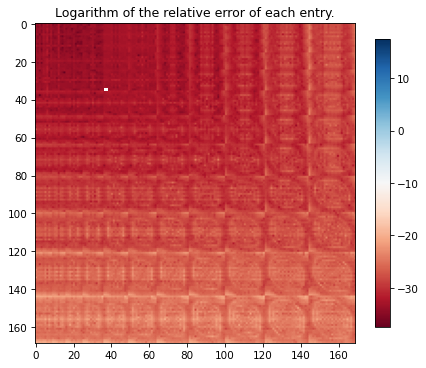

In [38]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v21_2d - data_v21) / np.abs(data_v21)
plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))
plt.colorbar(shrink = 0.9)
plt.title('Logarithm of the relative error of each entry.')
plt.show()

## `k_0_sj_semi_analytic_v1d`

This function returns a numpy array of two dimensions, which we will call `data_k`. The entries of the array are
$$data_k[p(2p + 1) + q, l(2l + 1) + m] = ( K_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}.$$

The `1d` on the name of the routine references the type of input it needs. See the following sections for details.

### Docstring

In [39]:
print(cross.k_0_sj_semi_analytic_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^0 with
    Helmholtz kernel evaluated and tested with complex
    spherical harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    properties of the spherical harmonics.

    Notes
    -----
    data_k[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^0 Y_l,m,j can be obtained analytically. A
    quadrature scheme is used to compute the surface integral
    corresponding to the inner product.

    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry

### Example

Definition of the parameters:

Radii:

In [40]:
radio_1 = 1.2
radio_2 = 3.

Positions of the center of the spheres:

In [41]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [42]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [43]:
big_l = 10
big_l_c = 2 * big_l + 5

Derivative of the spherical Bessel function:

In [44]:
j_lp_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0, derivative=True)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature, this differs from the routines without the `1d` in its name:

In [45]:
final_length, pre_vector_t, transform = (
    quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)
)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t)
)

We compute the array `data_k21`:

In [46]:
data_k21 = cross.k_0_sj_semi_analytic_v1d(
    big_l, k0, radio_1, radio_2, j_lp_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

To check its relationship with the $V^0_{2,1}$ operator, showed in the preliminaries:

In [47]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

In [48]:
eles = np.arange(0, big_l + 1)
jeys_array = np.diag(np.repeat(-k0 * (j_lp_1 / j_l_1), 2 * eles + 1))
aux = data_v21 @ jeys_array

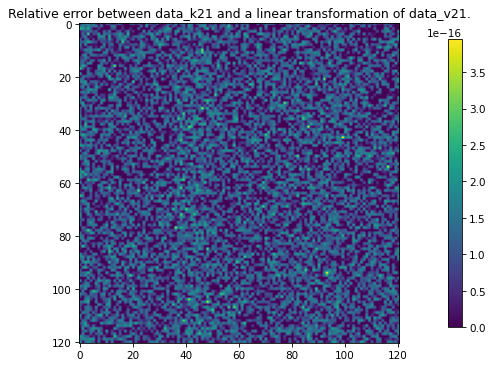

In [49]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_k21 - aux) / np.abs(data_k21)
plt.imshow(im)
plt.colorbar(shrink=0.9)
plt.title('Relative error between data_k21 and'
          ' a linear transformation of data_v21.')
plt.show()

## `k_0_sj_semi_analytic_v2d`

This function returns a numpy array of two dimensions, which we will call `data_k`. The entries of the array are
$$data_k[p(2p + 1) + q, l(2l + 1) + m] = ( K_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}.$$

It is the same than `k_0_sj_semi_analytic_v1d`, but with different inputs. For bigger computations this one is faster.

### Docstring

In [50]:
print(cross.k_0_sj_semi_analytic_v2d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^0 with
    Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of two dimensions, given by the function
    from_sphere_s_cartesian_to_j_spherical_2d of the module
    biosspheres.quadratures.spheres.

    Notes
    -----
    data_k[p(2p + 1) + q, l(2l + 1) + m] =
        ( K_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^0 Y_l,m,j can be obtained analytically.
    A quadrature scheme is used to compute the other surface integral.
    It uses functions from the package pyshtools to compute the
    spherical harmonic transforms.

    Parameters
    ----------
    big_l : int
        >= 0, max degree of sphe

### Example

Definition of parameters:

Radii:

In [51]:
radio_1 = 3.
radio_2 = 2.

Position of the center of the spheres:

In [52]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [53]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [54]:
big_l = 15
big_l_c = 2 * big_l + 5

Derivative of the spherical Bessel function:

In [55]:
j_lp_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0, derivative=True)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [56]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = (
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d
    )
)
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

We obtain the array data_k21:

In [57]:
data_k21_2d = cross.k_0_sj_semi_analytic_v2d(
    big_l, k0, radio_1, radio_2, j_lp_1, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

The result can be compared to the one computed by the previous routine:

In [58]:
final_length, pre_vector_t, transform = quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))
data_k21 = cross.k_0_sj_semi_analytic_v1d(
    big_l, k0, radio_1, radio_2, j_lp_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

C:\Users\there\AppData\Local\Temp\ipykernel_5828\3297778697.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))


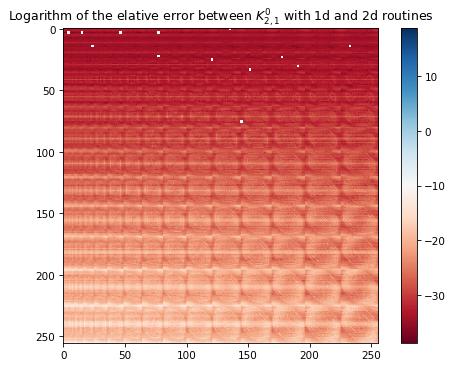

In [59]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_k21_2d - data_k21) / np.abs(data_k21_2d)
plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))
plt.colorbar()
plt.title('Logarithm of the elative error between $K_{2,1}^0$ with 1d and 2d routines')
plt.show()

## `k_0_sj_from_v_0_sj`

This functions uses the relationship between the operators $K^0_{s,j}$ and $V^0_{s,j}$ to compute `data_k` from `data_v`. See docstring for details.

### Docstring

In [60]:
print(cross.k_0_sj_from_v_0_sj.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^0 with
    Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    This routine needs the numpy array corresponding to the testing of
    V_{s,j}^0.

    Notes
    -----
    data_k[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    This computation uses the following result for this specific case:
    K_{s,j}^0 Y_{l,m} = -k0 * (j_l'(k0 r_j) / j_l (k0 r_j))
                        * V_{s,j}^0 Y_{l,m}.
    With j_l' the derivative of the spherical Bessel function, and j_l
    the spherical Bessel function.

    It will blow up if k0 r_j is a root of any j_l.

    Parameters
    ----------
    data_v : np.ndarray
        that represents a numerical approximation of the 

### Example

Definition of the parameters:

Radii:

In [61]:
radio_1 = 1.3
radio_2 = 1.7

Positions of the center of the spheres:

In [62]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [63]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rules:

In [64]:
big_l = 15
big_l_c = big_l + 5

Spherical Bessel function:

In [65]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)

We use one of the previous routine to calculate `data_21_2d`, which will be the input for computing `data_k21`

In [66]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)
data_v21_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

In [67]:
data_k21 = cross.k_0_sj_from_v_0_sj(data_v21_2d, k0, radio_1)

To compare

In [68]:
j_lp_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0, derivative=True)
data_k21_2d = cross.k_0_sj_semi_analytic_v2d(
    big_l, k0, radio_1, radio_2, j_lp_1, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

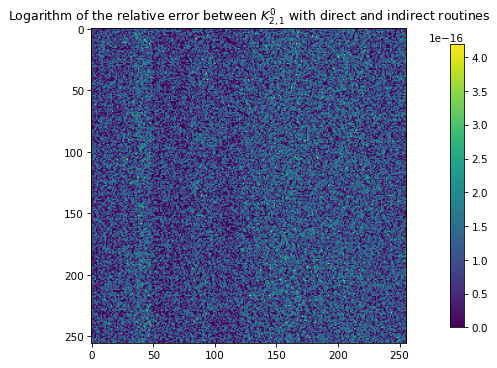

In [69]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_k21_2d - data_k21) / np.abs(data_k21)
plt.imshow(im)
plt.colorbar(shrink=0.9)
plt.title('Logarithm of the relative error between $K_{2,1}^0$ with direct and indirect '
          'routines')
plt.show()

## `ka_0_sj_semi_analytic_recurrence_v1d`

The `1d` on the name of the routine references the type of input it needs. See the following sections for details.

### Docstring

In [70]:
print(cross.ka_0_sj_semi_analytic_recurrence_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^{*0}
    with Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    properties of the spherical harmonics.

    Notes
    -----
    data_ka[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^{*0} Y_l,m,j can be obtained analytically.
    A quadrature scheme is used to compute the other surface integral
    corresponding to the inner product.
    For computing the derivative in theta a recurrence formula for
    Legendre Functions is used.

    In this routine the quadrature points 

### Example

Definition of the parameters:

Radii:

In [71]:
radio_1 = 3.
radio_2 = 2.

Positions of the center of the spheres:

In [72]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [73]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [74]:
big_l = 15
big_l_c = 2 *  big_l + 5

Spherical Bessel function:

In [75]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature, this differs from the routines without the `1d` in its name:

In [76]:
final_length, pre_vector_t, transform = (
    quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)
)
(r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf,
 er_1tf, eth_1tf, ephi_1tf) = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))

Calling of the function:

In [77]:
data_ka21 = cross.ka_0_sj_semi_analytic_recurrence_v1d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, er_1tf, eth_1tf, ephi_1tf, final_length,
    transform)

## `ka_0_sj_semi_analytic_recurrence_v2d`

### Docstring

In [78]:
print(cross.ka_0_sj_semi_analytic_recurrence_v2d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^{*0}
    with Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of two dimensions, given by the function
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d of
    the module biosspheres.quadratures.spheres.

    Notes
    -----
    data_ka[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^{*0} Y_l,m,j can be obtained analytically.
    A quadrature scheme is used to compute the other surface integral
    corresponding to the inner product.
    For computing the derivative in theta a recurrence formula for
    Legendre Functions is used.

    In th

### Example

Definition of the parameters:

Radii:

In [79]:
radio_1 = 3.
radio_2 = 2.

Positions of the center of the spheres:

In [80]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [81]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [82]:
big_l = 5
big_l_c = 25

Spherical Bessel function:

In [83]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [84]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
(r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d,
 er_1tf_2d, eth_1tf_2d, ephi_1tf_2d) = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

Calling of the function:

In [85]:
data_ka21_2d = cross.ka_0_sj_semi_analytic_recurrence_v2d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, er_1tf_2d, eth_1tf_2d, ephi_1tf_2d, weights,
    pre_vector_t_2d[2, :, 0], quantity_theta_points, quantity_phi_points,
    pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

If we compare with the previous routine:

In [86]:
final_length, pre_vector_t, transform = \
    quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)
(r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf,
 er_1tf, eth_1tf, ephi_1tf) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))
data_ka21 = cross.ka_0_sj_semi_analytic_recurrence_v1d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, er_1tf, eth_1tf, ephi_1tf, final_length,
    transform)

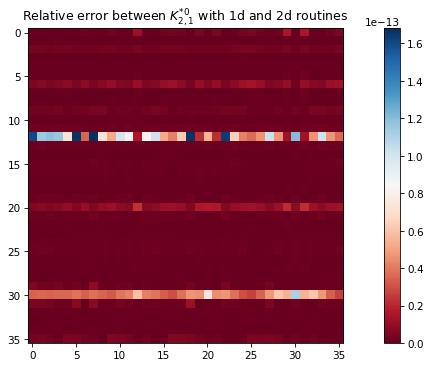

In [87]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_ka21_2d - data_ka21) / np.abs(data_ka21)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Relative error between $K_{2,1}^{*0}$ with 1d and 2d routines')
plt.show()

## `ka_0_sj_from_k_js`

### Docstring

In [88]:
print(cross.ka_0_sj_from_k_js.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^{*0}
    with Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    This routine needs the numpy array corresponding to K_{j,s}^0
    (notice the change of the order of the indexes indicating the
    spheres).

    Notes
    -----
    data_ka_sj[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    This computation uses the following result for this specific case:
    ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}
        = (-1)**(m+q) ( K_{j,s}^0 Y_{p,-q,s} ; Y_{l,-m,j} )_{L^2(S_j)}.

    Parameters
    ----------
    data_kjs : numpy array.
        represents a numerical approximation of the matrix formed by the
        boundary integral operator V_{s,j}^0 wit

### Example

Definition of parameters:

Radii:

In [89]:
radio_1 = 3.
radio_2 = 2.

Position of the center of the spheres:

In [90]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [91]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [92]:
big_l = 3
big_l_c = 25

Derivative of the spherical Bessel function:

In [93]:
j_lp_2 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_2 * k0, derivative=True)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [94]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_2tf_2d, phi_coord_2tf_2d, cos_theta_coord_2tf_2d = \
    (quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_1, p_2, p_1, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

In [95]:
data_k12_2d = cross.k_0_sj_semi_analytic_v2d(
    big_l, k0, radio_2, radio_1, j_lp_2, r_coord_2tf_2d, phi_coord_2tf_2d,
    cos_theta_coord_2tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

Calling of the function:

In [96]:
data_ka21 = cross.ka_0_sj_from_k_js(data_k12_2d)

To compare

In [97]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)
(r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d,
 er_1tf_2d, eth_1tf_2d, ephi_1tf_2d) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
data_ka21_2d = cross.ka_0_sj_semi_analytic_recurrence_v2d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, er_1tf_2d, eth_1tf_2d, ephi_1tf_2d, weights,
    pre_vector_t_2d[2, :, 0], quantity_theta_points, quantity_phi_points,
    pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

Text(0.5, 1.0, 'Relative error between $K_{2,1}^{*0}$ from $K_{2,1}^{0}$')

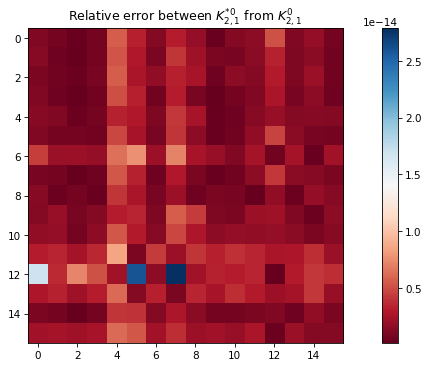

In [98]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_ka21_2d - data_ka21) / np.abs(data_ka21_2d)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Relative error between $K_{2,1}^{*0}$ from $K_{2,1}^{0}$')

## `w_0_sj_from_ka_sj`

### Docstring

In [99]:
print(cross.w_0_sj_from_ka_sj.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator W_{s,j}^0 with
    Helmholtz kernel evaluated and tested with complex spherical
    harmonics.
    This routine needs the numpy array corresponding to the testing of
    K_{s,j}^{*0}.

    Notes
    -----
    data_w[p*(2p+1) + q, l*(2l+1) + m] =
        ( W_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    This computation uses the following result for this specific case:
    W_{s,j}^0 Y_{l,m} = k0 * (j_l'(k0 r_j) / j_l (k0 r_j))
                        * K_{s,j}^{*0} Y_{l,m}.
    With j_l' the derivative of the spherical Bessel function, and j_l
    the spherical Bessel function.

    It will blow up if k0 r_j is a root of any j_l.

    Parameters
    ----------
    data_ka_sj : np.ndarray
        that represents a numerical approximatio

### Example

Definition of parameters:

Radii:

In [100]:
radio_1 = 3.
radio_2 = 2.

Position of the center of the spheres:

In [101]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Wave number:

In [102]:
k0 = 2.0

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [103]:
big_l = 10
big_l_c = 2* big_l + 5

Spherical Bessel function:

In [104]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `1d` in its name:

In [105]:
final_length, pre_vector_t, transform = \
    quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)
(r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf, er_times_n_1tf,
 etheta_times_n_1tf, ephi_times_n_1tf) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))

In [106]:
data_ka21 = cross.ka_0_sj_semi_analytic_recurrence_v1d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, er_times_n_1tf, etheta_times_n_1tf,
    ephi_times_n_1tf, final_length, transform
)

Calling of the function:

In [108]:
data_w21 = cross.w_0_sj_from_ka_sj(data_ka21, k0, radio_1)

To check

In [109]:
(r_coord_2tf, phi_coord_2tf, cos_theta_coord_2tf, er_times_n_2tf,
 etheta_times_n_2tf, ephi_times_n_2tf) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_1, p_2, p_1, final_length, pre_vector_t))

In [111]:
j_l_2 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_2 * k0)
data_ka12 = cross.ka_0_sj_semi_analytic_recurrence_v1d(
    big_l, k0, radio_2, radio_1, j_l_2, r_coord_2tf, phi_coord_2tf,
    cos_theta_coord_2tf, er_times_n_2tf,
    etheta_times_n_2tf, ephi_times_n_2tf, final_length, transform)

In [112]:
data_w12 = cross.w_0_sj_from_ka_sj(data_ka12, k0, radio_2)

In [114]:
sign_array = np.diag(
  (-np.ones((big_l + 1) ** 2)) ** (np.arange(0, (big_l + 1) ** 2))
)
giro_array = np.eye((big_l + 1) ** 2)
eles = np.arange(0, big_l + 1)
l_square_plus_l = eles * (eles + 1)
for el in np.arange(1, big_l + 1):
  giro_array[
    l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
    l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
  ] = np.fliplr(
    giro_array[
      l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
      l_square_plus_l[el] - el : l_square_plus_l[el] + el + 1,
    ]
  )
aux = (
  giro_array
  @ sign_array
  @ np.transpose(data_w21)
  @ sign_array
  @ giro_array
)

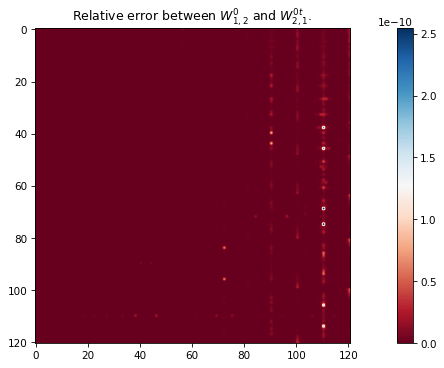

In [115]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_w12 - aux) / np.abs(data_w12)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Relative error between $W_{1,2}^0$ and $W_{2,1}^{0t}$.')
plt.show()

## Funciones que faltan por agregar

sj_pre_single_layer_semi_analytic_v1d

jey_array

w_0_sj_semi_analytic_recurrence_v1d

w_0_sj_semi_analytic_recurrence_v2d

a_0_sj_and_js_from_v_sj

v_k_w_0_sj_from_quadratures_1d

v_k_w_0_sj_from_quadratures_2d

a_0_sj_and_js_from_v_k_w

all_cross_interactions_n_spheres_from_v_1d

all_cross_interactions_n_spheres_from_v_2d

all_cross_interactions_n_spheres_1d

all_cross_interactions_n_spheres_2d